# Assi #2 NLP&FLP [TF-IDF]
## Silvana Yacoub 20201091
## Maher Mohsen 20200415
## S1

# Assi Points



 * 1\. Data
    * 1.1\. function to generate a document if it gets any phrase Generate more than one document in different fields.

 * 2\. Processing on data  
    * 2.1\. Cleaning data from each symbol or character doesn’t contain to the data.
    * 2.2\. Normalization: make all the data to lower case
    * 2.3\. Tokenization: split the data to words
    * 2.4\. Lemmatization or Stemming: return each word to origin.
    * 2.5\. Stop words: remove stop words from the data.

 * 3\. Unique words 
    * 3.1\. Get the unique words from the data.

 * 4\. TFIDF 
    * 4.1\. Get TF for each word for all documents.
    * 4.2\. Get IDF for each word.
    * 4.3\. Multiply TF * IDF
   * 4.4\. Get Normalized TFIDF

 * 5\. Bonus 
   * 5.1\. apply TFIDF from Scratch code and built in (sklearn) code with the same result

## 1. Data


### 1.1 function to generate a document if it gets any phrase Generate more than one document in different fields.

In [20]:
import random
import nltk
from nltk.corpus import gutenberg
from nltk.corpus import genesis
from nltk.corpus import inaugural
from nltk.corpus import webtext
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import re
from nltk.corpus import reuters
import pandas as pd
import numpy as np

In [21]:
import nltk
import random

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('genesis')
nltk.download('inaugural')
nltk.download('webtext')
nltk.download('treebank')
nltk.download('words')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mezwm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mezwm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mezwm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\mezwm\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\mezwm\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\mezwm\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\webtext.zip.
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users

In [22]:
def generate_random_document():
    words = nltk.corpus.inaugural.words()
    num_words = random.randint(100, 300)  # Adjust the word count range as needed
    random_words = ' '.join(random.choices(words, k=num_words))
    return random_words

In [23]:
def generate_documents(n_documents):
    documents = []
    for _ in range(n_documents):
        doc = generate_random_document()
        documents.append(doc)
    return documents

## 2. Processing on data

### 2.1 Cleaning data from each symbol or character doesn’t contain to the data.

In [4]:
def clean_data(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    return text

### 2.2 Normalization: make all the data to lower case

In [5]:
def normalize_text(text):
    normalized_text = text.lower()
    return normalized_text

### 2.3 Tokenization: split the data to words

In [6]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

### 2.4 Lemmatization or Stemming: return each word to origin.

In [7]:
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

### 2.5 Stop words: remove stop words from the data.

In [8]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

## 3. Unique words

### 3.1 Get the unique words from the data.

In [9]:
def get_unique_words(tokens):
    unique_words = set(tokens)
    return unique_words

## 4. TFIDF

### 4.1 TFIDF from scratch

In [10]:
import math
from collections import Counter

$$TF(t,d) = \frac{\text{number of times t appears in d}}{\text{total numbert of terms in d}}$$

In [11]:

def compute_term_frequencies(documents):
    term_frequencies = []
    for doc in documents:
        word_counts = Counter(doc)
        total_words = len(doc)
        term_frequency = {word: count / total_words for word, count in word_counts.items()}
        term_frequencies.append(term_frequency)
    return term_frequencies



$$idf(t) = \log{\frac{1+n}{1+df(t)}}+1$$

In [12]:
def compute_inverse_document_frequencies(documents):
    total_docs = len(documents)
    inverse_document_frequencies = {}
    for doc in documents:
        for word in set(doc):
            inverse_document_frequencies[word] = inverse_document_frequencies.get(word, 0)

    inverse_document_frequencies = {word: math.log(((total_docs + 1) / (count + 1)) + 1) for word, count in inverse_document_frequencies.items()}
    return inverse_document_frequencies



$$TF-IDF = TF * IDF$$

In [13]:
def compute_tf_idf(documents):
    term_frequencies = compute_term_frequencies(documents)
    inverse_document_frequencies = compute_inverse_document_frequencies(documents)

    tf_idf_scores = []
    for doc_tf in term_frequencies:
        doc_tf_idf = {word: tf_val * inverse_document_frequencies[word] for word, tf_val in doc_tf.items()}
        tf_idf_scores.append(doc_tf_idf)

    return tf_idf_scores



$$NormalizedTF-IDF = \frac{X}{||\mathbf{X}||}_2$$

In [14]:
def normalize_tfidf_scores(tfidf_scores):
    normalized_tfidf_scores = []
    for doc in tfidf_scores:
        norm = np.linalg.norm(list(doc.values()))
        normalized_doc = {word: tfidf_val / norm for word, tfidf_val in doc.items()}
        normalized_tfidf_scores.append(normalized_doc)

    return normalized_tfidf_scores

In [15]:
def to_dataframe(docs,tfidf_matrix,vectorizer):
    return pd.DataFrame(
        tfidf_matrix.T.toarray(),
        index=vectorizer.get_feature_names_out(),
        columns= [f"Doc {i+1}" for i in range(len(docs))],
    )

### 4.2 TFIDF with Sklearn

In [16]:
def calculate_tfidf(documents):
    flattened_documents = [' '.join(doc) for doc in documents]

    vectorizer = TfidfVectorizer()

    tfidf_matrix = vectorizer.fit_transform(flattened_documents)

    return tfidf_matrix, vectorizer

# Workspace

In [24]:
docs = generate_documents(2)

In [25]:
docs

['British the if are , administer women than the up interstate been their have by to , war tyranny moral proposed commitment and the problems same of American be are use disbursement Day revenue war us the God On families be room . us . kind to these on waste for any who we wars of lit , can of of opposed available of the on a normalcy been yet to To from industry to perfect it America the world self having transactions record and Republic for we efficient constantly of . lose clearly . . its own only be . sufficiently be , people pursued Upon mountain is , . full undisturbed the be concurrence of the public appear mountains the national the with and so good enforce , Magistrate and prodigal World the my depart the sun , . perpetuate country ; must of in , of that have the will conflict subject tolerance stamp to had first have responsibility happiness more we be has man the greatness avoid revenue resources its refuse victories . an now today unworthy of of always not to misery and ou

In [ ]:
for i in range(len(docs)):
    docs[i] = remove_stopwords(lemmatize_text(tokenize_text(normalize_text(clean_data(docs[i])))))

In [31]:
doc_1_unique = get_unique_words(docs[0])
doc_2_unique = get_unique_words(docs[1])

In [33]:
print(doc_1_unique)

{'perpetuate', 'waste', 'feeling', 'must', 'transaction', 'depart', 'british', 'clearly', 'appear', 'strong', 'record', 'wisdom', 'perfect', 'sufficiently', 'magistrate', 'sun', 'man', 'refuse', 'avoid', 'disbursement', 'mountain', 'kind', 'self', 'happiness', 'moral', 'victory', 'upon', 'constantly', 'people', 'american', 'world', 'best', 'national', 'greatness', 'move', 'opposed', 'every', 'lit', 'resource', 'tolerance', 'oppose', 'always', 'administer', 'war', 'interstate', 'tyranny', 'full', 'concurrence', 'great', 'none', 'revenue', 'prodigal', 'industry', 'use', 'lose', 'good', 'undisturbed', 'responsibility', 'day', 'pursued', 'efficient', 'commitment', 'apply', 'god', 'america', 'today', 'stamp', 'way', 'oath', 'yet', 'room', 'u', 'endure', 'proposed', 'republic', 'family', 'public', 'available', 'ha', 'country', 'almost', 'forth', 'life', 'normalcy', 'conflict', 'woman', 'first', 'problem', 'misery', 'early', 'staunchest', 'especially', 'ninth', 'enforce', 'subject', 'unworthy

In [32]:
print(doc_2_unique)

{'apt', 'ask', 'spirit', 'let', 'questioned', 'duty', 'lighted', 'u', 'interest', 'hope', 'soul', 'constitutional', 'merit', 'well', 'authority', 'construction', 'truth', 'must', 'public', 'effort', 'people', 'country', 'commonwealth', 'co', 'heart', 'keep', 'national', 'inland', 'detail', 'without', 'obligation', 'life', 'price', 'view', 'whoever', 'military', 'action', 'one', 'man', 'shield', 'helping', 'compensate', 'ocean', 'born', 'purpose', 'tribe', 'tempest', 'decisive', 'reform', 'matter', 'portion', 'terminated', 'face', 'law', 'marched', 'society', 'exhausting', 'reward', 'adverted', 'since', 'disregarded', 'inauguration', 'principle', 'stranger', 'disability', 'become', 'profit', 'le', 'government', 'president', 'across', 'whose', 'history'}


In [34]:
for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])

In [35]:
docs

['british administer woman interstate war tyranny moral proposed commitment problem american use disbursement day revenue war u god family room u kind waste war lit opposed available normalcy yet industry perfect america world self transaction record republic efficient constantly lose clearly sufficiently people pursued upon mountain full undisturbed concurrence public appear mountain national good enforce magistrate prodigal world depart sun perpetuate country must conflict subject tolerance stamp first responsibility happiness ha man greatness avoid revenue resource refuse victory today unworthy always misery endure great way feeling apply almost oppose oath ha whose best great good public public none wisdom early good forth staunchest especially every ninth move strong life',
 'profit hope history government matter construction tempest interest exhausting portion ask ocean duty tribe across soul adverted commonwealth u military reform must country national detail terminated price si

In [39]:
tfidf_matrix,vectorizer = calculate_tfidf(docs)

In [40]:
df = to_dataframe(docs,tfidf_matrix,vectorizer)

In [41]:
tfidf = compute_tf_idf(docs)
normalized_tfidf = normalize_tfidf_scores(tfidf)


## 5. Bonus

In [54]:
for idx, doc_tfidf in enumerate(normalized_tfidf):
    print(f"TF-IDF for document {idx + 1}:")
    for key, value in doc_tfidf.items():
        if(len(key) > 1):
            print(f"({key})  Scratch : {round(value, 2)}, built-in : {round(df[f'Doc {idx+1}'][key],2)}")

TF-IDF for document 1:
(british)  Scratch : 0.08, built-in : 0.09
(administer)  Scratch : 0.08, built-in : 0.09
(woman)  Scratch : 0.08, built-in : 0.09
(interstate)  Scratch : 0.08, built-in : 0.09
(war)  Scratch : 0.25, built-in : 0.27
(tyranny)  Scratch : 0.08, built-in : 0.09
(moral)  Scratch : 0.08, built-in : 0.09
(proposed)  Scratch : 0.08, built-in : 0.09
(commitment)  Scratch : 0.08, built-in : 0.09
(problem)  Scratch : 0.08, built-in : 0.09
(american)  Scratch : 0.08, built-in : 0.09
(use)  Scratch : 0.08, built-in : 0.09
(disbursement)  Scratch : 0.08, built-in : 0.09
(day)  Scratch : 0.08, built-in : 0.09
(revenue)  Scratch : 0.17, built-in : 0.18
(god)  Scratch : 0.08, built-in : 0.09
(family)  Scratch : 0.08, built-in : 0.09
(room)  Scratch : 0.08, built-in : 0.09
(kind)  Scratch : 0.08, built-in : 0.09
(waste)  Scratch : 0.08, built-in : 0.09
(lit)  Scratch : 0.08, built-in : 0.09
(opposed)  Scratch : 0.08, built-in : 0.09
(available)  Scratch : 0.08, built-in : 0.09
(no

In [43]:
import matplotlib.pyplot as plt

In [44]:
def plot_tfidf_values(tfidf_matrix, feature_names):
    # Calculate the mean TF-IDF value for each feature (word)
    tfidf_means = np.mean(tfidf_matrix, axis=0).tolist()[0]

    # Pair feature names with their mean TF-IDF values
    features_with_tfidf = list(zip(feature_names, tfidf_means))

    # Sort features by their TF-IDF values
    features_with_tfidf.sort(key=lambda x: x[1], reverse=True)

    # Extract sorted feature names and TF-IDF values
    sorted_features = [feature[0] for feature in features_with_tfidf]
    sorted_tfidf_values = [feature[1] for feature in features_with_tfidf]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features[:10], sorted_tfidf_values[:10], color='skyblue')
    plt.xlabel('TF-IDF Value')
    plt.title('Top 10 Words by TF-IDF Value')
    plt.gca().invert_yaxis()
    plt.show()

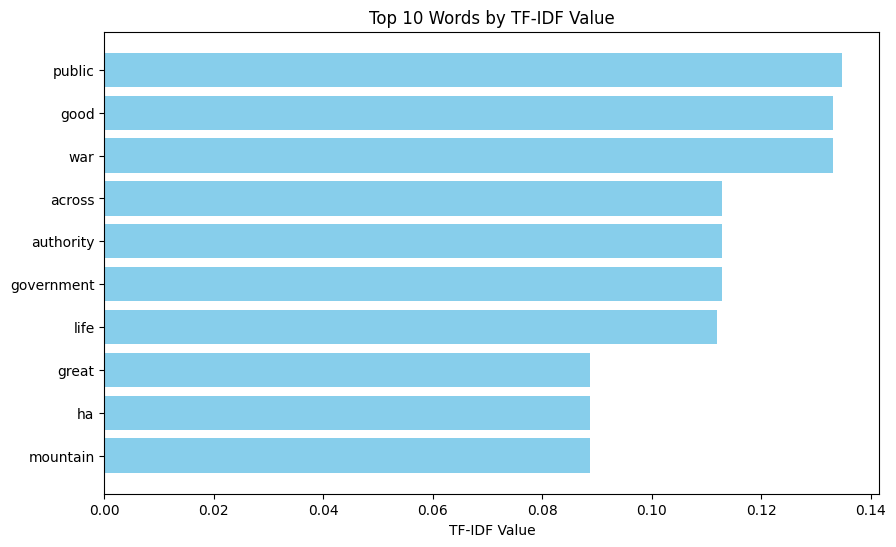

In [45]:
plot_tfidf_values(tfidf_matrix, vectorizer.get_feature_names_out())